In [1]:
from segmentandoDatasets import segmentando_datasets
segmentando_datasets(1000,1000,1000)

DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from tensorflow.keras.optimizers import Adam
import keras 

import os
os.environ['XLA_FLAGS'] = '--xla_gpu_strict_conv_algorithm_picker=false'



2024-09-10 16:47:22.403086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 16:47:22.417518: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 16:47:22.421510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 16:47:22.431243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 16:47:23.254268: W tensorflow/compiler/tf2

In [3]:
from preprocessamento import *

csv_file = 'Datasets_csv/df_PUC.csv'
treino_gerador, validacao_gerador, teste_gerador, x_treino, y_treino, x_teste, y_teste, x_validacao, y_validacao = preprocessamento(csv_file, 0.6, 0.2, 0.2)

Found 600 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [4]:
print(x_treino.shape)

(600, 256, 256, 3)


In [5]:
class Autoencoder(tf.keras.Model):
    def __init__(self, input_shape=(256, 256, 3)):
        super(Autoencoder, self).__init__()
        self.input_shape = input_shape
        
        # Definir o encoder
        self.encoder = self.build_encoder()
        # Definir o decoder
        self.decoder = self.build_decoder()

    def build_encoder(self):
        input_img = Input(shape=self.input_shape)
        
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2), padding='same')(x)
        
        return Model(inputs=input_img, outputs=x, name='encoder')

    def build_decoder(self):
        input_encoded = Input(shape=self.encoder.output_shape[1:])
        
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_encoded)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)
        decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
        
        return Model(inputs=input_encoded, outputs=decoded, name='decoder')

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        return self.encoder(x)

    def decode(self, x):
        return self.decoder(x)

In [6]:
# Exemplo de uso
autoencoder = Autoencoder()
autoencoder.build(input_shape=(256, 256, 3)) 
autoencoder.summary()

I0000 00:00:1725997648.222097    8070 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725997648.256954    8070 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725997648.257110    8070 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725997648.258258    8070 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ (None, 32, 32, 32)     │        29,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 256, 256, 3)    │        38,723 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,227 (266.51 KB)

 Trainable params: 68,227 (266.51 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:

checkpoint_path = 'weights_parciais/weights-improvement-{epoch:02d}-{loss:.2f}.weights.h5'
cp_callback = ModelCheckpoint(filepath=checkpoint_path, 
                                  save_weights_only=True, 
                                  monitor='loss',
                                  mode='max', 
                                  save_best_only=True, 
                                  verbose=1)

In [8]:
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

history = autoencoder.fit(x_treino, x_treino,
                epochs=10,
                batch_size=16,
                shuffle=True,
                callbacks=[cp_callback],
                validation_data=(x_validacao, x_validacao))

Epoch 1/10


I0000 00:00:1725997652.435626    8152 service.cc:146] XLA service 0x798b5008de00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725997652.435644    8152 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-09-10 16:47:32.488911: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-10 16:47:32.662242: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1725997656.014119    8152 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725997656.241219    8152 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 2/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0522

I0000 00:00:1725997660.615905    8152 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0432

E0000 00:00:1725997666.379033    8152 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725997666.599778    8152 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725997667.247918    8152 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725997667.466187    8152 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 0.0430
Epoch 1: loss improved from -inf to 0.03696, saving model to weights_parciais/weights-improvement-01-0.04.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 345ms/step - loss: 0.0429 - val_loss: 0.0176
Epoch 2/10
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0137
Epoch 2: loss did not improve from 0.03696
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0135 - val_loss: 0.0045
Epoch 3/10
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0041
Epoch 3: loss did not improve from 0.03696
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0032
Epoch 4: loss did not improve from 0.03696
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 5/10
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0020
Epoch 5: loss did not improve from 0.03696
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 6/10
38/3

<Axes: >

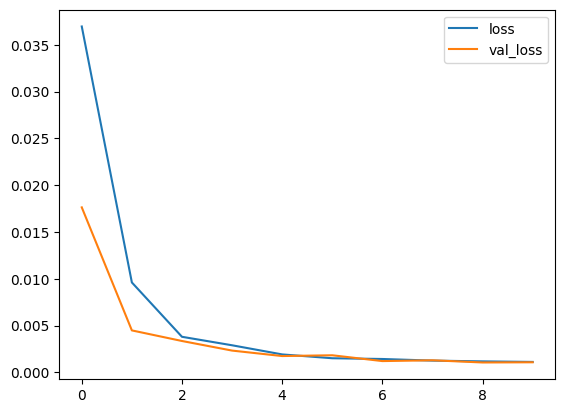

In [9]:
pd.DataFrame(history.history).plot()

In [10]:
autoencoder.save("Modelos_keras/Autoencoder.keras")
autoencoder.save_weights("weights_finais/Autoencoder.weights.h5")

In [11]:
autoencoder.load_weights("weights_finais/Autoencoder.weights.h5")

In [12]:
encoded_imgs = autoencoder.encode(x_teste)
reconstructed_images = autoencoder.decode(encoded_imgs)

2024-09-10 16:48:40.698915: W external/local_tsl/tsl/framework/bfc_allocator.cc:482] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.12GiB (rounded to 3355443200)requested by op Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-09-10 16:48:40.698939: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-09-10 16:48:40.698947: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 433, Chunks in use: 432. 108.2KiB allocated for chunks. 108.0KiB in use in bin. 4.7KiB client-requested in use in bin.
2024-09-10 16:48:40.698951: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2024-09-10 16:48:40.698956: I extern

ResourceExhaustedError: Exception encountered when calling Conv2D.call().

[1m{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[200,256,256,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D][0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(200, 256, 256, 3), dtype=float32)

In [ ]:
print("Shape das imagens de teste:", x_teste.shape)
print("Shape das imagens codificadas:", encoded_imgs.shape)
print("Shape das imagens reconstruídas:", reconstructed_images.shape)


In [ ]:
print("Forma das imagens codificadas:", encoded_imgs.shape)
print("Forma das labels de treinamento:", y_treino.shape)


In [24]:
encoded_imgs = tf.reshape(encoded_imgs, (encoded_imgs.shape[0], -1))  # Achatar para (batch_size, 32*32*32)


In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_original_and_reconstructed(model, X_val, num_images=5):
    """
    Plota as imagens originais e suas versões reconstruídas pelo autoencoder.
    
    Parâmetros:
        model (keras.Model): O modelo do autoencoder treinado.
        X_val (numpy.ndarray): Conjunto de dados de validação.
        num_images (int): Número de imagens a serem plotadas.
    """
    plt.figure(figsize=(12, 6))

    for i in range(num_images):
        # Seleciona uma imagem aleatória do conjunto de validação
        image_index = np.random.randint(0, len(X_val))
        original_image = X_val[image_index]

        # Passa a imagem original pelo autoencoder para obter a imagem reconstruída
        reconstructed_image = model.predict(original_image.reshape(1, 256, 256, 3))[0]

        # Plota a imagem original e a reconstruída
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_image)
        plt.title("Original")
        plt.axis("off")

        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_image)
        plt.title("Reconstruída")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
plot_original_and_reconstructed(autoencoder, x_teste)

In [ ]:
from preprocessamento import preprocessamento_dataframe_unico

UFPR04, _ = preprocessamento_dataframe_unico("Datasets_csv/df_UFPR04.csv", True)
UFPR05, _ = preprocessamento_dataframe_unico("Datasets_csv/df_UFPR05.csv", True)

In [28]:
X_UFPR04,_ = next(UFPR04)
X_UFPR05,_ = next(UFPR05)

In [ ]:
plot_original_and_reconstructed(autoencoder, X_UFPR04)
plot_original_and_reconstructed(autoencoder, X_UFPR05)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split

# Assumindo que você já tem as imagens codificadas e os rótulos
# encoded_imgs shape: (num_amostras, 32, 32, 32)
# labels: lista ou array com rótulos 'empty' ou 'occupied'

# Converter rótulos para formato numérico
label_map = {'empty': 0, 'occupied': 1}
numeric_labels = np.array([label_map[label] for label in labels])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(encoded_imgs, numeric_labels, test_size=0.2, random_state=42)

# Criar o modelo
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 32)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nAcurácia no conjunto de teste: {test_acc}')

# Fazer previsões
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Você pode usar estas previsões para análise adicional ou visualização